In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data1=pd.read_csv("/content/temp1.csv")
data2=pd.read_csv("/content/temp2.csv")
data1.head(5)
data2.head(5)

,days,temperature
0,11,80.3
1,12,98.3
2,13,55.0
3,14,22.3
4,15,101.3


In [5]:
data1.shape
data2.shape

(10, 2)

In [6]:
data1["class"]=1
data2["class"]=0

In [7]:
data1_manual_testing=data1.tail(5)
for i in range(9,4,-1):
  data1.drop([i],axis=0, inplace=True)

data2_manual_testing=data2.tail(5)
for i in range(9,4,-1):
  data2.drop([i],axis=0, inplace=True)

In [8]:
data_manual_testing=pd.concat([data2_manual_testing,data1_manual_testing], axis=0)
data_manual_testing.to_csv("manual_testing.csv")

In [9]:
data_merge=pd.concat([data2,data1],axis=0)
data_merge.head(5)

,days,temperature,class
0,11,80.3,0
1,12,98.3,0
2,13,55.0,0
3,14,22.3,0
4,15,101.3,0


class
0    5
1    5
Name: temperature, dtype: int64


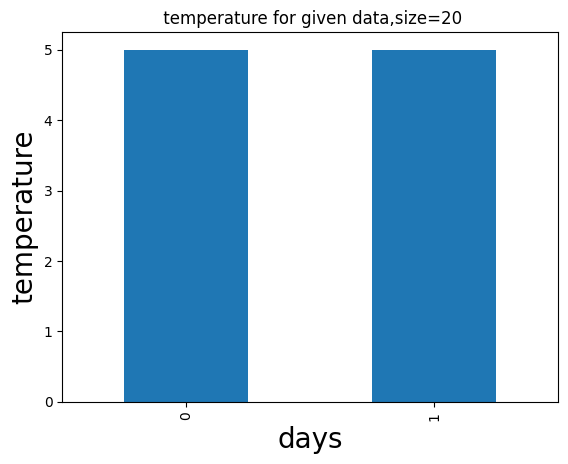

In [12]:
print(data_merge.groupby(['class'])['temperature'].count())
data_merge.groupby(['class'])['temperature'].count().plot(kind="bar")
plt.title(" temperature for given data,size=20")
plt.xlabel("days",size=20)
plt.ylabel("temperature",size=20)
plt.show()

class
0    5
1    5
Name: temperature, dtype: int64
0=days
1=temperature


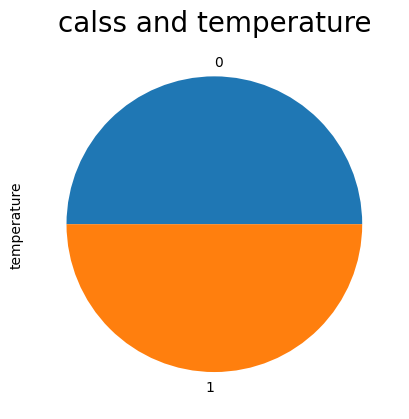

In [17]:
print(data_merge.groupby(['class'])['temperature'].count())
print("0=days\n1=temperature")
data_merge.groupby(['class'])['temperature'].count().plot(kind="pie")
plt.title("calss and temperature",size=20)
plt.show()

In [18]:
x=data_merge["temperature"]
y=data_merge["days"]

In [19]:
from sklearn.model_selection import train_test_split as ttp
import re
import string

In [20]:
x_train,x_test,y_train,y_test=ttp(x,y,test_size=0.25,random_state=0)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer()
x_train=x_train.astype(str)
x_test=x_test.astype(str)
xv_train=vector.fit_transform(x_train)
xv_test=vector.transform(x_test)

accuracy is 0.0
              precision    recall  f1-score   support

           4       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       0.0
          13       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0

[[0 1 0 0]
 [0 0 0 0]
 [0 1 0 0]
 [0 1 0 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

<Axes: >

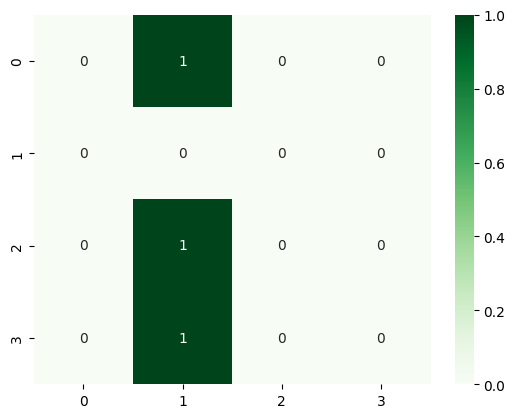

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
LR=LogisticRegression()
LR.fit(xv_train,y_train)
accuracy=LR.score(xv_test,y_test).round(2)
print("accuracy is",accuracy)
pred_LR=LR.predict(xv_test)
print(classification_report(y_test,pred_LR))
cm=confusion_matrix(y_test,pred_LR)
print(cm)
sns.heatmap(cm,cmap="Greens",annot=True)